In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
urls = [
    ('https://excheck.pro/company/5001026970/finances?type=results&year=2013'),
    ('https://excheck.pro/company/5001026970/finances?type=results&year=2014'),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2015"),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2016"),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2017"),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2018"),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2019"),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2020"),
    ("https://excheck.pro/company/5001026970/finances?type=results&year=2021")
]

info = []

for url in urls:
    responce = requests.get(url)
    soup = BeautifulSoup(responce.text, "lxml")
    s = soup.find("span", class_ ="accounting-value")
    s.text
    info += s
print(info)

['6,4 млрд ₽', '7,9 млрд ₽', '12,8 млрд ₽', '20,6 млрд ₽', '26,6 млрд ₽', '22,8 млрд ₽', '19,3 млрд ₽', '22,5 млрд ₽', '22,9 млрд ₽']


In [3]:
df = pd.DataFrame({
  "year" : ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
  'revenue': info})
df

,year,revenue
0,2013,"6,4 млрд ₽"
1,2014,"7,9 млрд ₽"
2,2015,"12,8 млрд ₽"
3,2016,"20,6 млрд ₽"
4,2017,"26,6 млрд ₽"
5,2018,"22,8 млрд ₽"
6,2019,"19,3 млрд ₽"
7,2020,"22,5 млрд ₽"
8,2021,"22,9 млрд ₽"


In [4]:
df['revenue'] = pd.to_numeric(df['revenue'].str.replace('\D', ''), errors='coerce')
df

<ipython-input-4-181291cc6f3f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['revenue'] = pd.to_numeric(df['revenue'].str.replace('\D', ''), errors='coerce')


,year,revenue
0,2013,64
1,2014,79
2,2015,128
3,2016,206
4,2017,266
5,2018,228
6,2019,193
7,2020,225
8,2021,229


In [5]:
df['revenue'] = df['revenue'].apply(lambda x: x * 1000000000000)
df

,year,revenue
0,2013,64000000000000
1,2014,79000000000000
2,2015,128000000000000
3,2016,206000000000000
4,2017,266000000000000
5,2018,228000000000000
6,2019,193000000000000
7,2020,225000000000000
8,2021,229000000000000


In [6]:
df1 = pd.date_range(start='31/12/2012', end = '31/12/2021', freq='W')
df1 = pd.DataFrame(df1)
df1

<ipython-input-6-b3e6ad409849>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1 = pd.date_range(start='31/12/2012', end = '31/12/2021', freq='W')


,0
0,2013-01-06
1,2013-01-13
2,2013-01-20
3,2013-01-27
4,2013-02-03
...,...
464,2021-11-28
465,2021-12-05
466,2021-12-12
467,2021-12-19


In [7]:
df1.columns = ['weaks'] 
df1

,weaks
0,2013-01-06
1,2013-01-13
2,2013-01-20
3,2013-01-27
4,2013-02-03
...,...
464,2021-11-28
465,2021-12-05
466,2021-12-12
467,2021-12-19


In [8]:
r = []
for i in df['revenue']:
  r.append(round(i / 52))
r

[1230769230769,
 1519230769231,
 2461538461538,
 3961538461538,
 5115384615385,
 4384615384615,
 3711538461538,
 4326923076923,
 4403846153846]

In [9]:
df1['revenue'] = ''
df1

,weaks,revenue
0,2013-01-06,
1,2013-01-13,
2,2013-01-20,
3,2013-01-27,
4,2013-02-03,
...,...,...
464,2021-11-28,
465,2021-12-05,
466,2021-12-12,
467,2021-12-19,


In [10]:
df1['revenue'].iloc[:52] = r[0]
df1['revenue'].iloc[52:104] = r[1]
df1['revenue'].iloc[104:156] = r[2]
df1['revenue'].iloc[156:208] = r[3]
df1['revenue'].iloc[208:260] = r[4]
df1['revenue'].iloc[260:312] = r[5]
df1['revenue'].iloc[312:364] = r[6]
df1['revenue'].iloc[364:416] = r[7]
df1['revenue'].iloc[416:] = r[8]
print(df1)

         weaks        revenue
0   2013-01-06  1230769230769
1   2013-01-13  1230769230769
2   2013-01-20  1230769230769
3   2013-01-27  1230769230769
4   2013-02-03  1230769230769
..         ...            ...
464 2021-11-28  4403846153846
465 2021-12-05  4403846153846
466 2021-12-12  4403846153846
467 2021-12-19  4403846153846
468 2021-12-26  4403846153846

[469 rows x 2 columns]


<ipython-input-10-326eea859190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revenue'].iloc[:52] = r[0]
<ipython-input-10-326eea859190>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revenue'].iloc[52:104] = r[1]
<ipython-input-10-326eea859190>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revenue'].iloc[104:156] = r[2]
<ipython-input-10-326eea859190>:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [11]:
arr13 = []
sub = 0.0
z = 0
for i in df1['revenue']:
    if z <=7:          #январь февраль
        coef = 0.1  
        sub += 0.014
        coef += sub
        f = i * coef
        arr13.append(f)
    elif 7 < z <= 20:    # весна
        coef = 0.09
        sub += 0.046
        coef += sub
        f = i * coef
        arr13.append(f)
    elif 20 < z <= 33:   #лето
        coef = 0.13
        sub += 0.04
        coef += sub
        f = i * coef
        arr13.append(f)
    elif 33 < z <= 46:     #осень
        coef = 0.1
        sub += 0.031
        coef += sub
        f = i * coef
        arr13.append(f)
    elif 46 < z <= 51:         #декабрь
        coef = 0.09
        sub += 0.039
        coef += sub
        f = i * coef
        arr13.append(f)
    z+=1  
    
print(len(arr13))
print(sum(arr13))


52
63983999999988.0


In [12]:
z = 0 
sub = 0.0
arr14 = []
for i in df1['revenue']:
    if 51 < z <= 59:        #январь февраль 
        coef = 0.7
        sub += 0.011
        coef += sub
        f = i * coef
        arr14.append(f)
    elif 59 < z <= 72:    # весна
        coef = 0.07
        sub += 0.03
        coef += sub
        f = i * coef
        arr14.append(f)
    elif 72 < z <= 86:   #лето
        coef = 0.1
        sub += 0.02
        coef += sub
        f = i * coef
        arr14.append(f)
    elif 86 < z <= 99:     #осень
        coef = 0.89
        sub += 0.025
        coef += sub
        f = i * coef
        arr14.append(f)
    elif 99 < z <= 103:         #декабрь
        coef = 0.8
        sub += 0.04
        coef += sub
        f = i * coef
        arr14.append(f)
    z += 1
print(len(arr14))
print(sum(arr14))

52
79916096153858.31


In [13]:
z = 0
sub = 0.0
arr15 = []
for i in df1['revenue']:
    if 103 < z <= 111:        #январь февраль
        coef = 0.25
        sub += 0.019
        coef += sub
        f = i * coef
        arr15.append(f)
    elif 111 < z <= 125:    # весна
        coef = 0.21
        sub += 0.04
        coef += sub
        f = i * coef
        arr15.append(f)
    elif 125 < z <= 138:   #лето
        coef = 0.23
        sub += 0.02
        coef += sub
        f = i * coef
        arr15.append(f)
    elif 138 < z <= 151:     #осень
        coef = 0.21
        sub += 0.038
        coef += sub
        f = i * coef
        arr15.append(f)
    elif 151 < z <= 155:         #декабрь
        coef = 0.24
        sub += 0.03
        coef += sub
        f = i * coef
        arr15.append(f)  
    z += 1
print(len(arr15))
print(sum(arr15))

52
127916307692283.73


In [14]:
z = 0
sub = 0.0
arr16 = []
for i in df1['revenue']:
    if 155 < z <= 164:        #январь февраль
        coef = 0.25
        sub += 0.0163
        coef += sub
        f = i * coef
        arr16.append(f)
    elif 164 < z <= 177:    # весна
        coef = 0.21
        sub += 0.04
        coef += sub
        f = i * coef
        arr16.append(f)
    elif 177 < z <= 190:   #лето
        coef = 0.23
        sub += 0.03
        coef += sub
        f = i * coef
        arr16.append(f)
    elif 190 < z <= 203:     #осень
        coef = 0.21
        sub += 0.03
        coef += sub
        f = i * coef
        arr16.append(f)
    elif 203 < z <= 207:         #декабрь
        coef = 0.24
        sub += 0.039
        coef += sub
        f = i * coef
        arr16.append(f)  
    z += 1
print(len(arr16))
print(sum(arr16))

52
205927107692283.8


In [15]:
z = 0
sub = 0.0
arr17 = []
for i in df1['revenue']:
    if 207 < z <= 216:        #январь февраль
        coef = 0.28
        sub += 0.011
        coef += sub
        f = i * coef
        arr17.append(f)
    elif 216 < z <= 229:    # весна
        coef = 0.2
        sub += 0.026
        coef += sub
        f = i * coef
        arr17.append(f)
    elif 229 < z <= 242:   #лето
        coef = 0.28
        sub += 0.047
        coef += sub
        f = i * coef
        arr17.append(f)
    elif 242 < z <= 255:     #осень
        coef = 0.28
        sub += 0.033
        coef += sub
        f = i * coef
        arr17.append(f)
    elif 255 < z <= 260:         #декабрь
        coef = 0.26
        sub += 0.029
        coef += sub
        f = i * coef
        arr17.append(f) 
    z += 1
print(len(arr17))
print(sum(arr17))

53
265918884615403.28


In [16]:
z = 0
sub = 0.0
arr18 = []
for i in df1['revenue']:
    if 260 < z <= 268:        #январь февраль
        coef = 0.049
        sub += 0.011
        coef += sub
        f = i * coef
        arr18.append(f)
    elif 268 < z <= 281:    # весна
        coef = 0.043
        sub += 0.0353
        coef += sub
        f = i * coef
        arr18.append(f)
    elif 281 < z <= 294:   #лето
        coef = 0.044
        sub += 0.015
        coef += sub
        f = i * coef
        arr18.append(f)
    elif 294 < z <= 307:     #осень
        coef = 0.042
        sub += 0.15
        coef += sub
        f = i * coef
        arr18.append(f)
    elif 307 < z <= 312:         #декабрь
        coef = 0.042
        sub += 0.01
        coef += sub
        f = i * coef
        arr18.append(f)  
    z += 1
print(len(arr18))
print(sum(arr18))

52
227924790384594.97


In [17]:
z = 0
sub = 0.0
arr19 = []
for i in df1['revenue']:
    if 312 < z <= 320:        #январь февраль
        coef = 0.059
        sub += 0.031
        coef += sub
        f = i * coef
        arr19.append(f)
    elif 320 < z <= 333:    # весна
        coef = 0.037
        sub += 0.03
        coef += sub
        f = i * coef
        arr19.append(f)
    elif 333 < z <= 346:   #лето
        coef = 0.044
        sub += 0.04
        coef += sub
        f = i * coef
        arr19.append(f)
    elif 346 < z <= 359:     #осень
        coef = 0.049
        sub += 0.04
        coef += sub
        f = i * coef
        arr19.append(f)
    elif 359 < z <= 364:         #декабрь
        coef = 0.059
        sub += 0.2
        coef += sub
        f = i * coef
        arr19.append(f)
    z += 1
print(len(arr19))
print(sum(arr19))

52
192995557692285.1


In [18]:
z = 0
sub = 0.0
arr20 = []
for i in df1['revenue']:
    if 364 < z <= 372:        #январь февраль
        coef = 0.03
        sub += 0.04
        coef += sub
        f = i * coef
        arr20.append(f)
    elif 372 < z <= 386:    # весна
        coef = 0.03
        sub += 0.029
        coef += sub
        f = i * coef
        arr20.append(f)
    elif 386 < z <= 399:   #лето
        coef = 0.016
        sub += 0.042
        coef += sub
        f = i * coef
        arr20.append(f)
    elif 399 < z <= 412:     #осень
        coef = 0.04
        sub += 0.04
        coef += sub
        f = i * coef
        arr20.append(f)
    elif 412 < z <= 416:         #декабрь
        coef = 0.05
        sub += 0.08
        coef += sub
        f = i * coef
        arr20.append(f)
    z += 1
print(len(arr20))
print(sum(arr20))

52
224980249999995.94


In [19]:
z = 0
sub = 0.0
arr21 = []
for i in df1['revenue']:
    if 416 < z <= 425:        #январь февраль
        coef = 0.05
        sub += 0.03
        coef += sub
        f = i * coef
        arr21.append(f)
    elif 425 < z <= 438:    # весна
        coef = 0.053
        sub += 0.04
        coef += sub
        f = i * coef
        arr21.append(f)
    elif  438 < z <= 451:   #лето
        coef = 0.054
        sub += 0.032
        coef += sub
        f = i * coef
        arr21.append(f)
    elif 451 < z <= 464:     #осень
        coef = 0.04
        sub += 0.048
        coef += sub
        f = i * coef
        arr21.append(f)
    elif z > 464:         #декабрь
        coef = 0.042
        sub += 0.04
        coef += sub
        f = i * coef
        arr21.append(f)
    z += 1
print(len(arr21))
print(sum(arr21))

52
228898711538453.6


In [20]:
fin_arr = []
fin_arr = arr13 + arr14 + arr15 + arr16 + arr17 + arr18 + arr19 + arr20 + arr21
len(fin_arr)

469

In [21]:
df1 = df1.drop(columns = 'revenue', axis = 1)

In [22]:
df1['revenue'] = fin_arr
df1

,weaks,revenue
0,2013-01-06,1.403077e+11
1,2013-01-13,1.575385e+11
2,2013-01-20,1.747692e+11
3,2013-01-27,1.920000e+11
4,2013-02-03,2.092308e+11
...,...,...
464,2021-11-28,8.235192e+12
465,2021-12-05,8.420154e+12
466,2021-12-12,8.596308e+12
467,2021-12-19,8.772462e+12


In [23]:
fa = []
for i in df1['revenue']:
    t = round(i)
    fa.append(t)
len(fa)

469

In [24]:
df1['revenue'] = fa
df1

,weaks,revenue
0,2013-01-06,140307692308
1,2013-01-13,157538461538
2,2013-01-20,174769230769
3,2013-01-27,192000000000
4,2013-02-03,209230769231
...,...,...
464,2021-11-28,8235192307692
465,2021-12-05,8420153846154
466,2021-12-12,8596307692307
467,2021-12-19,8772461538461


In [25]:
df1.to_csv('revenue_data.csv', index = False)

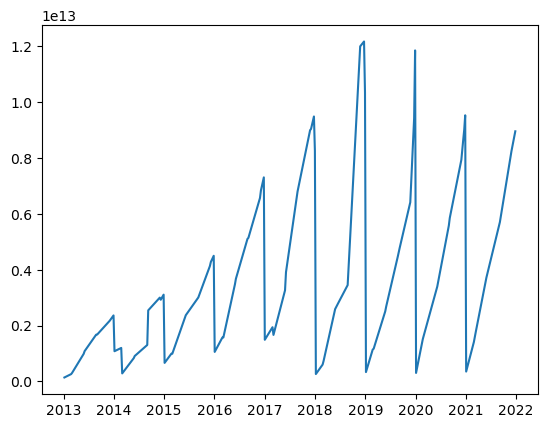

In [ ]:
plt.plot(df1['weaks'], df1['revenue'], label = 'выручка')

In [ ]:
z = 0
w13 = []
w14 = []
w15 = []
w16 = []
w17 = []
w18 = []
w19 = []
w20 = []
w21 = []
for i in df1['revenue']:
    if z <=7 or 46 < z < 51:
        w13.append(i)
    elif 51 < z <= 59 or 99 < z <= 103:
        w14.append(i)
    elif 103 < z <= 111 or 151 < z <= 155:
        w15.append(i)
    elif 155 < z <= 164 or 203 < z < 207:
        w16.append(i)
    elif 207 < z <= 216 or 255 < z < 259:
        w17.append(i)
    elif 260 < z <= 268 or 307 < z < 312:
        w18.append(i)
    elif 312 < z <= 320 or 359 < z < 364:
        w19.append(i)
    elif 364 < z <= 372 or 412 < z <= 416:
        w20.append(i)
    elif 416 < z < 425 or z > 464:
        w21.append(i)
    z+= 1

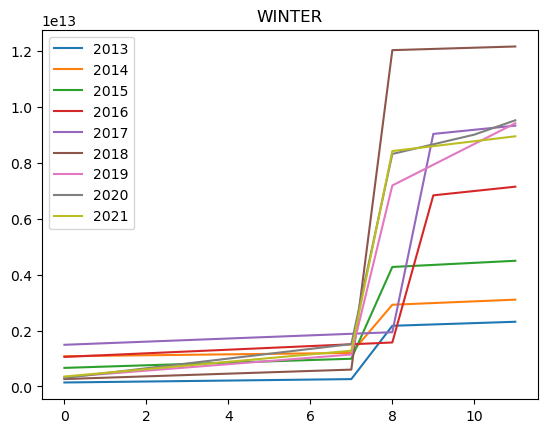

In [ ]:
x = list(range(12))
y1 = w13 
y2 = w14
y3 = w15
y4 = w16
y5 = w17
y6 = w18
y7 = w19
y8 = w20
y9 = w21


plt.plot(x,y1, label = '2013')
plt.plot(x,y2, label = '2014')
plt.plot(x,y3, label = '2015')
plt.plot(x,y4, label = '2016')
plt.plot(x,y5, label = '2017')
plt.plot(x,y6, label = '2018')
plt.plot(x,y7, label = '2019')
plt.plot(x,y8, label = '2020')
plt.plot(x,y9, label = '2021')
plt.legend()
plt.title("WINTER")
plt.show()

In [ ]:
z = 0
s13 = []
s14 = []
s15 = []
s16 = []
s17 = []
s18 = []
s19 = []
s20 = []
s21 = []
for i in df1['revenue']:
    if 7 < z <= 20:
        s13.append(i)
    elif 59 < z <= 72:
        s14.append(i)
    elif 111 < z < 125:
        s15.append(i)
    elif 164 < z <= 177:
        s16.append(i)
    elif 216 < z <= 229:
        s17.append(i)
    elif 268 < z <= 281:
        s18.append(i)
    elif 320 < z <= 333:
        s19.append(i)
    elif 372 < z < 386:
        s20.append(i)
    elif 425 < z <= 438:
        s21.append(i)
    z+= 1
print(len(s21))

13


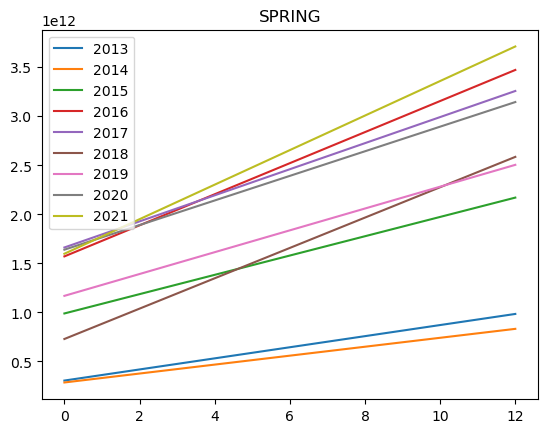

In [ ]:
x = list(range(13))
y1 = s13 
y2 = s14
y3 = s15
y4 = s16
y5 = s17
y6 = s18
y7 = s19
y8 = s20
y9 = s21


plt.plot(x,y1, label = '2013')
plt.plot(x,y2, label = '2014')
plt.plot(x,y3, label = '2015')
plt.plot(x,y4, label = '2016')
plt.plot(x,y5, label = '2017')
plt.plot(x,y6, label = '2018')
plt.plot(x,y7, label = '2019')
plt.plot(x,y8, label = '2020')
plt.plot(x,y9, label = '2021')
plt.legend()
plt.title("SPRING")
plt.show()

In [ ]:
z = 0
su13 = []
su14 = []
su15 = []
su16 = []
su17 = []
su18 = []
su19 = []
su20 = []
su21 = []
for i in df1['revenue']:
    if 20 < z <= 33:
        su13.append(i)
    elif 72 < z < 86:
        su14.append(i)
    elif 125 < z <= 138:
        su15.append(i)
    elif 177 < z <= 190:
        su16.append(i)
    elif 229 < z <= 242:
        su17.append(i)
    elif 281 < z <= 294:
        su18.append(i)
    elif 333 < z <= 346:
        su19.append(i)
    elif 386 < z <= 399:
        su20.append(i)
    elif 438 < z <= 451:
        su21.append(i)
    z+= 1
print(len(su21))

13


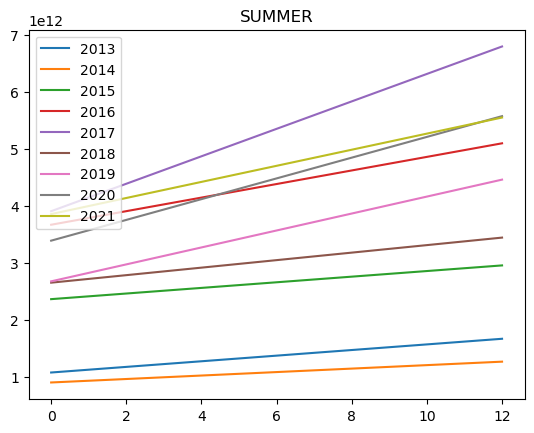

In [ ]:
x = list(range(13))
y1 = su13 
y2 = su14
y3 = su15
y4 = su16
y5 = su17
y6 = su18
y7 = su19
y8 = su20
y9 = su21


plt.plot(x,y1, label = '2013')
plt.plot(x,y2, label = '2014')
plt.plot(x,y3, label = '2015')
plt.plot(x,y4, label = '2016')
plt.plot(x,y5, label = '2017')
plt.plot(x,y6, label = '2018')
plt.plot(x,y7, label = '2019')
plt.plot(x,y8, label = '2020')
plt.plot(x,y9, label = '2021')
plt.legend()
plt.title("SUMMER")
plt.show()

In [ ]:
z = 0
a13 = []
a14 = []
a15 = []
a16 = []
a17 = []
a18 = []
a19 = []
a20 = []
a21 = []
for i in df1['revenue']:
    if 33 < z <= 46:
        a13.append(i)
    elif 86 < z <= 99:
        a14.append(i)
    elif 138 < z <= 151:
        a15.append(i)
    elif 190 < z <= 203:
        a16.append(i)
    elif 242 < z <= 255:
        a17.append(i)
    elif 294 < z <= 307:
        a18.append(i)
    elif 346 < z <= 359:
        a19.append(i)
    elif 399 < z <= 412:
        a20.append(i)
    elif 451 < z <= 464:
        a21.append(i)
    z+= 1
print(len(a21))

13


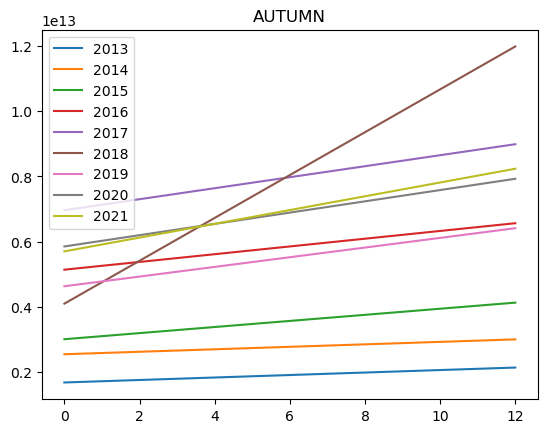

In [ ]:
x = list(range(13))
y1 = a13 
y2 = a14
y3 = a15
y4 = a16
y5 = a17
y6 = a18
y7 = a19
y8 = a20
y9 = a21


plt.plot(x,y1, label = '2013')
plt.plot(x,y2, label = '2014')
plt.plot(x,y3, label = '2015')
plt.plot(x,y4, label = '2016')
plt.plot(x,y5, label = '2017')
plt.plot(x,y6, label = '2018')
plt.plot(x,y7, label = '2019')
plt.plot(x,y8, label = '2020')
plt.plot(x,y9, label = '2021')
plt.legend()
plt.title("AUTUMN")
plt.show()